### Note
**How to Edit the Notebook:**

To edit the notebook, follow these steps:
* Open the shared link to the notebook in Google Colab.
* Make sure you are logged in to your Google account.
* Click on "File" in the Colab menu.
* Select "Save a copy in Drive." This will create a copy of the original notebook in your Google Drive.
* You can now freely edit the copied notebook without affecting the original version.

Great Resourses to learn opencv:
* [youtube playlist](https://youtube.com/playlist?list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K)
* [opencv docs](https://docs.opencv.org/4.x/)

### Import Packages

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

### importing image with grey scale or b/w fliter

In [ ]:
img = cv.imread('dog.jpeg', cv.IMREAD_GRAYSCALE)

### Simple thresholding

In [ ]:
_ , th1 = cv.threshold(img , 150 , 255 , cv.THRESH_BINARY)
_ , th2 = cv.threshold(img , 127 , 255 , cv.THRESH_BINARY_INV)

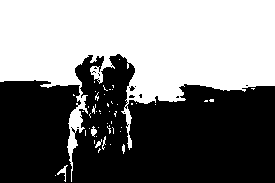

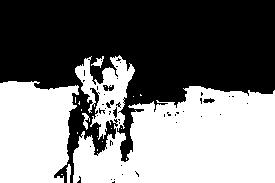

In [ ]:
cv2_imshow(th1)
cv2_imshow(th2)


### Adaptive thresholding

In [ ]:
th1 = cv.adaptiveThreshold(img , 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C ,cv.THRESH_BINARY , 11 , 2 )
th2 = cv.adaptiveThreshold(img , 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY , 11 , 2)

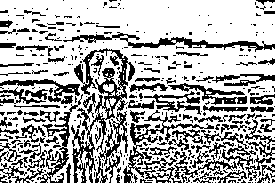

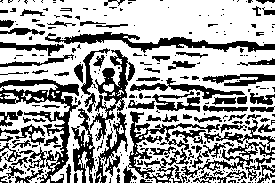

In [ ]:
cv2_imshow(th1)
cv2_imshow(th2)

### Using Matplotlib

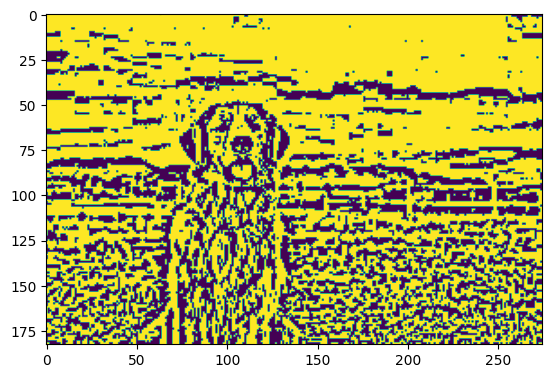

In [ ]:
plt.imshow(th1)
plt.show()

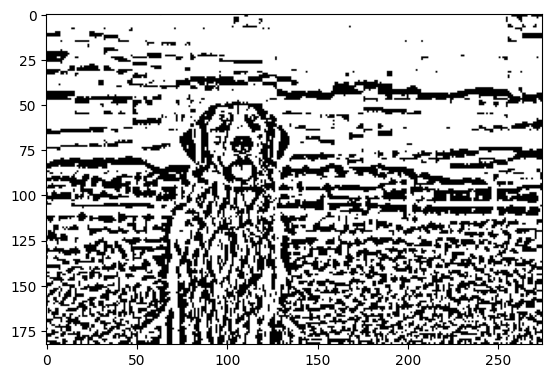

In [ ]:
#coverting bgr to rgb
img = cv.cvtColor(th1 , cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

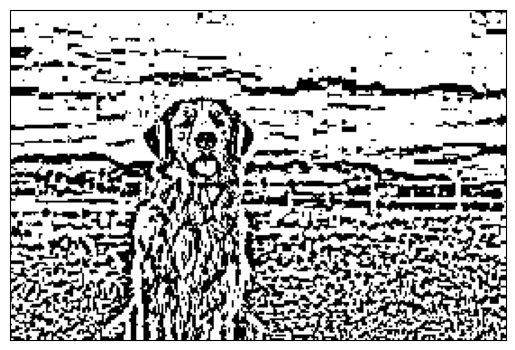

In [ ]:
# removing axis
img = cv.cvtColor(th1 , cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

##### showing multiple images

In [ ]:
img = cv.imread('dog.jpeg', cv.IMREAD_GRAYSCALE)

In [ ]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

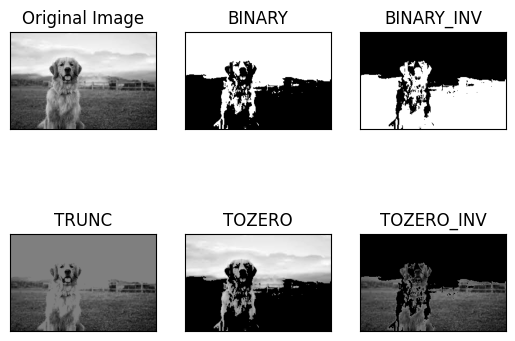

<Figure size 2600x2400 with 0 Axes>

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  # 2 rows and 3 columns
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.figure(figsize=(26,24 ))
plt.show()

# Morphological tranformation

*  **Erosion:** Suitable for reducing noise and removing small isolated salt-and-pepper pixels.
*  **Dilation:** Useful for filling small gaps caused by salt-and-pepper noise and connecting nearby components.
*  **Opening:** A combination of erosion followed by dilation. Useful for removing noise while preserving the main structures.
*  **Closing:** A combination of dilation followed by erosion. Effective for closing gaps and joining nearby regions.




In [ ]:
img = cv.imread('/content/maxence-pira-gFY14qtHtnM-unsplash.jpg', cv.IMREAD_GRAYSCALE)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
thresh1 = cv.cvtColor(thresh1 , cv.COLOR_BGR2RGB)
kernel = np.ones((2,2),np.uint8)
erosion = cv.erode(thresh1,kernel,iterations = 1)
dilation= cv.dilate(thresh1,kernel,iterations = 1)
opening = cv.morphologyEx(thresh1, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel)


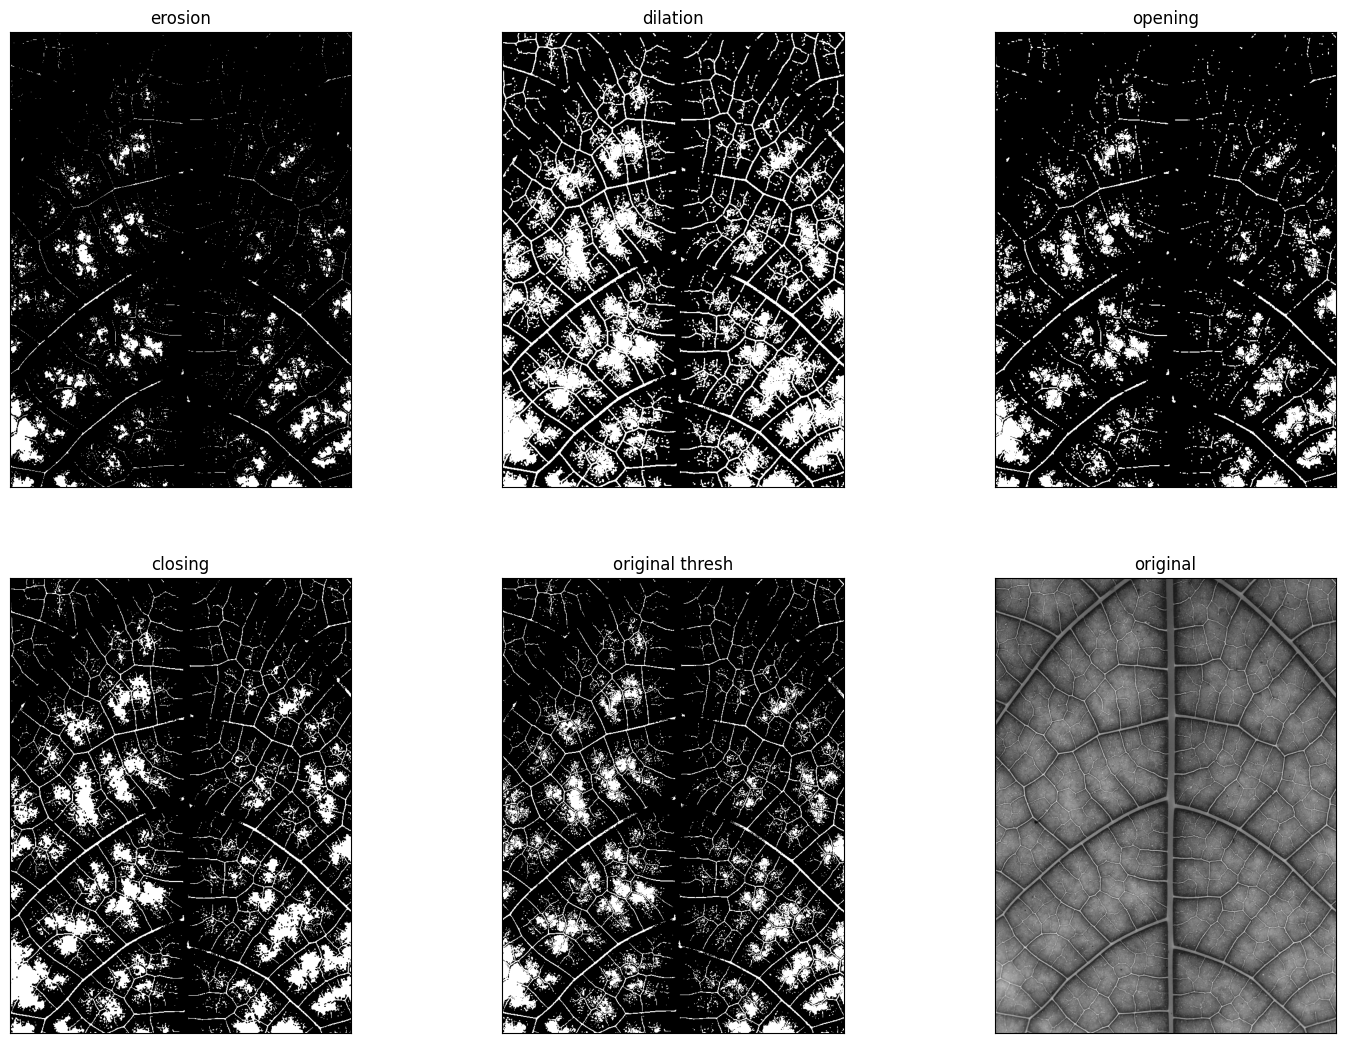

In [ ]:
# plotting all the images
images = [erosion , dilation , opening , closing, thresh1 , img]
titles = ['erosion','dilation', 'opening','closing' , 'original thresh' ,'original' ]
plt.figure(figsize = (18,13))
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# Bluring

*   **Gaussian Blur:** Commonly used for general noise reduction and smoothing images while preserving overall structures.

*   **Median Blur:** Effective at removing salt-and-pepper noise, resulting in a cleaner image.

*   **Bilateral Filter:** Ideal for noise reduction while maintaining sharp edges and details in the image.

*   **Custom Kernel Blur(filter2D):** Offers flexibility in blurring by using a user-defined kernel, enabling precise control over the blurring effect.



In [ ]:
blur_img = cv.imread('/content/maxence-pira-gFY14qtHtnM-unsplash.jpg',cv.IMREAD_GRAYSCALE)
blur_img= cv.cvtColor(blur_img , cv.COLOR_BGR2RGB)

In [ ]:
kernel = np.ones((5,5),np.float32)/25
filter_blur= cv.filter2D(blur_img,-1,kernel)
gussian_blur = blur = cv.GaussianBlur(blur_img,(5,5),0)
median_blur = cv.medianBlur(blur_img,5)
bilateral_blur = cv.bilateralFilter(blur_img,9,75,75)

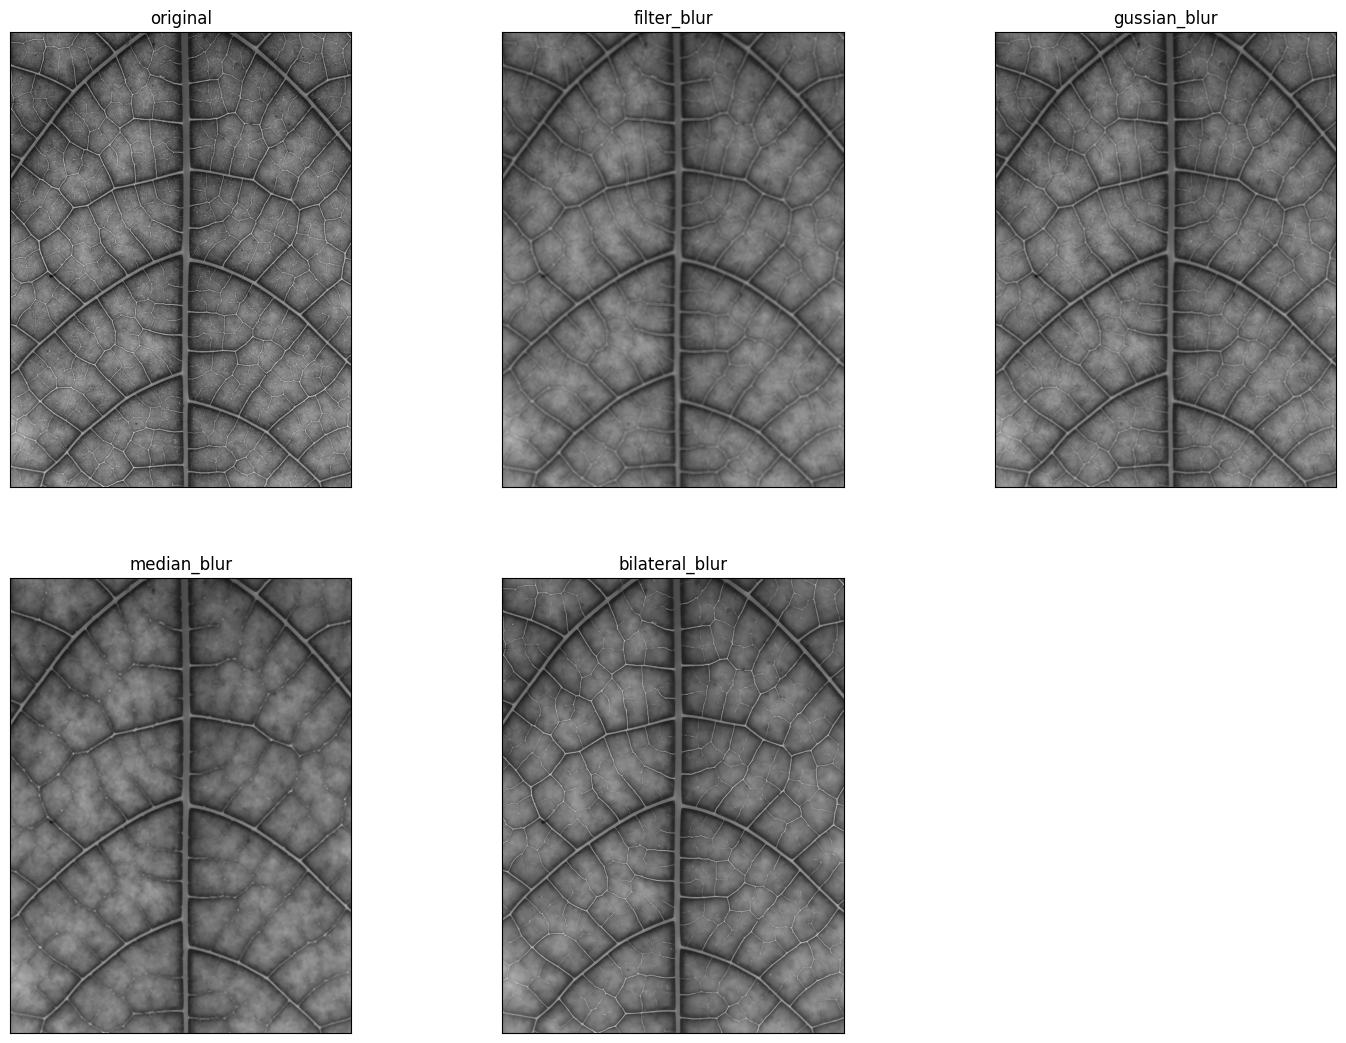

In [ ]:
images = [ blur_img ,filter_blur,gussian_blur,median_blur,bilateral_blur ]
titles = ['original' , 'filter_blur','gussian_blur','median_blur','bilateral_blur']
plt.figure(figsize= (18,13))
for i in range(5):
 plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()